# The Markov Chain Monte Carlo revolution

Stanford’s Statistics Department has a drop-in consulting service. One day, a psychologist from the state prison system showed up with a collection of coded messages. The problem was to decode these messages. Marc (Stanford student) guessed that the code was a simple substitution cipher, each symbol standing for a letter, number, punctuation mark or space. Thus, there is an unknown function $f$:

$$f: \{\text{code space}\} → \{\text{usual alphabet}\}.$$

In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
import sys
import random
from copy import deepcopy
from copy import copy
from collections import Counter

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2


One standard approach to decrypting is to use the statistics of written English to guess at probable choices for $f$ , try these out, and see if the decrypted messages make sense. To get the statistics, Marc downloaded a standard text ("War and Peace" and "Hamlet") and recorded the first-order transitions: the proportion of consecutive text symbols from $x$ to $y$. This gives two matrices $M(x, y)$ of transitions.

##Exercise 1 :
complete the following code. write a function *compute_statistics* that calculates statistics for a given textual file.

In [54]:
from collections import Counter
import numpy as np

# Function to compute statistics from the file
def compute_statistics(filename):
    with open(filename, 'r', encoding='utf-8') as file:
        text = file.read()
    frequency_statistics = Counter(text)
    chars = sorted(frequency_statistics.keys())
    char_to_ix = {char: ix for ix, char in enumerate(chars)}
    ix_to_char = {ix: char for char, ix in char_to_ix.items()}
    n = len(chars)
    transition_matrix = np.zeros((n, n))
    for i in range(len(text) - 1):
        if text[i] in char_to_ix and text[i + 1] in char_to_ix:
            transition_matrix[char_to_ix[text[i]], char_to_ix[text[i + 1]]] += 1
    with np.errstate(divide='ignore', invalid='ignore'):
        transition_probabilities = np.nan_to_num(transition_matrix / transition_matrix.sum(axis=1, keepdims=True))
    return char_to_ix, ix_to_char, transition_probabilities, frequency_statistics





In [55]:
filename = "warpeace_input.txt"
char_to_ix, ix_to_char, tr, fr = compute_statistics(filename)

filename_2 = "shakespeare_input.txt"
char_to_ix_2, ix_to_char_2, tr_2, fr_2 = compute_statistics(filename_2)


In [56]:
assert len(char_to_ix) == 83
assert len(ix_to_char_2) == 67

##Exercise 2 :
complete the following code. plot the frequency statistics for characters.

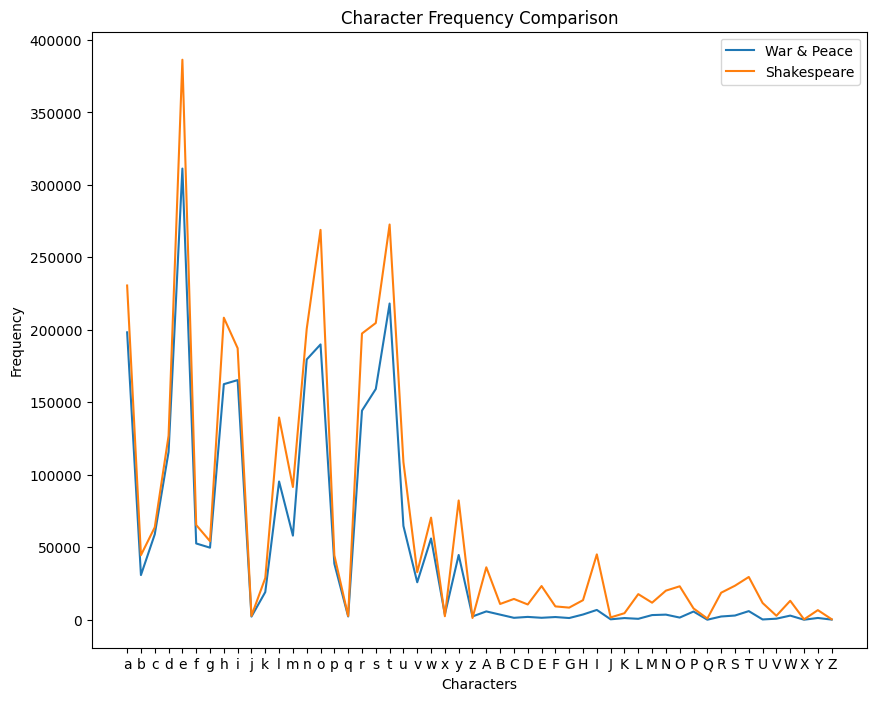

In [21]:
chars = list('abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ')

fr_stat = {char: fr[char] if char in fr else 0 for char in chars}
fr_stat_2 = {char: fr_2[char] if char in fr_2 else 0 for char in chars}

plt.figure(figsize=(10, 8))
plt.plot(chars, [fr_stat[char] for char in chars], label='War & Peace')
plt.plot(chars, [fr_stat_2[char] for char in chars], label='Shakespeare')
plt.legend()
plt.xlabel('Characters')
plt.ylabel('Frequency')
plt.title('Character Frequency Comparison')
plt.show()



##Exercise 3 :
complete the following code. write a function *generate_random_permutation_map* that generates a random permutation map for given character list without digits.

In [43]:
def az_list():
    """
    Returns a default a-zA-Z characters list
    """
    cx = list('abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ')
    return cx

def generate_identity_p_map(chars):
    """
    Generates an identity permutation map for given list of characters

    Arguments:
    chars: list of characters

    Returns:
    p_map: an identity permutation map

    """
    p_map = {}
    for c in chars:
        p_map[c] = c

    return p_map


# Function to generate a random permutation map
def generate_random_permutation_map(chars):
    chars_list = list(chars)
    shuffled_chars = chars_list[:]
    random.shuffle(shuffled_chars)
    p_map = {char: shuffled_char for char, shuffled_char in zip(chars_list, shuffled_chars)}
    return p_map




In [44]:
assert len(p_map) == 83


##Exercise 4 :
complete the following code. write a function *scramble_test* that scrambles a text given a permutation map.

In [58]:
def scramble_text(text, p_map):
    """
    Scrambles a text given a permutation map

    Arguments:
    text: text to scramble, list of characters
    p_map: permutation map to scramble text based upon

    Returns:
    text_2: the scrambled text
    """
    scrambled_text = []
    for char in text:
        if char in p_map:
            scrambled_text.append(p_map[char])
        else:
            scrambled_text.append(char)  # If character not in p_map, keep it unchanged
    return scrambled_text

def pretty_print(text):
    print(''.join(text[:500]), '...')

s = list(open(filename_2, 'r').read()[530:1000])

t = list(s)
p_map = generate_random_permutation_map(char_to_ix.keys())
p_map_reverse = {c: x for x, c in p_map.items()}
scrambled_text = scramble_text(t, p_map)
print('Original text:')
pretty_print(t)
print('\n')
print('Encrypted text:')
pretty_print(scrambled_text)
# Unscramble the text to validate
unscrambled_text = scramble_text(scrambled_text, p_map_reverse)






Original text:
.
What authority surfeits on would relieve us: if they
would yield us but the superfluity, while it were
wholesome, we might guess they relieved us humanely;
but they think we are too dear: the leanness that
afflicts us, the object of our misery, is as an
inventory to particularise their abundance; our
sufferance is a gain to them Let us revenge this with
our pikes, ere we become rakes: for the gods know I
speak this in hunger for bread, not in thirst for revenge.

 ...


Encrypted text:
nD5o2Jk2êJo=?MJWk3ê?lhMJ3k=bkx=êApk?hAMhrhkê30kMlkJohWDx=êApkWMhApkê3kNêJkJohk3ê!h?lAêMJWRkxoMAhkMJkxh?hDxo=Ah3=éhRkxhkéM*oJk*êh33kJohWk?hAMhrhpkê3koêé2bhAW DNêJkJohWkJoMbZkxhk2?hkJ==kph2?0kJohkAh2bbh33kJo2JD2llAMàJ3kê3RkJohk=NmhàJk=lk=ê?kéM3h?WRkM3k23k2bDMbrhbJ=?WkJ=k!2?JMàêA2?M3hkJohM?k2Nêbp2bàh k=ê?D3êllh?2bàhkM3k2k*2MbkJ=kJohék:hJkê3k?hrhb*hkJoM3kxMJoD=ê?k!MZh3Rkh?hkxhkNhà=éhk?2Zh30kl=?kJohk*=p3kZb=xkLD3!h2ZkJoM3kMbkoêb*h?kl=?kN?h2pRkb=JkMbkJoM?3Jkl=?k?hrhb*hnDD ...


In [61]:
# Assert the unscrambled text matches the original text
assert t == unscrambled_text, "The unscrambled text does not match the original text!"

##Exercise 5 :
complete the following code. write a function *compute_transition_counts* that computes transition counts for a given text and mapping of letters to indices.

In [62]:
# Function to compute transition counts for given text
def compute_transition_counts(text, char_to_ix):
    n = len(char_to_ix)
    transition_counts = np.zeros((n, n))
    for i in range(len(text) - 1):
        if text[i] in char_to_ix and text[i + 1] in char_to_ix:
            transition_counts[char_to_ix[text[i]], char_to_ix[text[i + 1]]] += 1
    return transition_counts




In [63]:
transtion_counts = compute_transition_counts(scrambled_text, char_to_ix)

transtion_counts

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [64]:
assert transtion_counts.shape[0] == len(char_to_ix)

In [65]:
def compute_log_probability_by_counts(transition_counts, text, permutation_map, char_to_ix, frequency_statistics, transition_matrix, epsilon=1e-10):
    """
    Computes the log probability of a text under a given permutation map (switching the
    character c from permutation_map[c]), given the transition counts and the text

    Arguments:
    transition_counts: a matrix such that transition_counts[i, j] gives the counts of times j follows i
    text: text to compute probability of, should be list of characters
    permutation_map[c]: gives the character to replace 'c' by
    char_to_ix: characters to index mapping
    frequency_statistics: frequency of character i is stored in frequency_statistics[i]
    transition_matrix: probability of j following i stored at [i, j] in this matrix

    Returns:
    p: log likelihood of the given text
    """
    p = 0.0
    c0 = char_to_ix[permutation_map[text[0]]]
    p += np.log(frequency_statistics[c0] + epsilon)
    p_map_indices = {char_to_ix[c1]: char_to_ix[c2] for c1, c2 in permutation_map.items()}
    for i in range(len(text) - 1):
        if text[i] in char_to_ix and text[i + 1] in char_to_ix:
            c1 = p_map_indices[char_to_ix[text[i]]]
            c2 = p_map_indices[char_to_ix[text[i + 1]]]
            p += transition_counts[char_to_ix[text[i]], char_to_ix[text[i + 1]]] * np.log(transition_matrix[c1, c2] + epsilon)
    return p

p2 = compute_log_probability_by_counts(transtion_counts, scrambled_text, p_map, char_to_ix, fr, tr)
p2


-49765.8001467459

In [66]:
# Assert that log probability is computed and is a finite number
assert np.isfinite(p2), "Log probability is not finite!"
assert isinstance(p2, float), "Log probability is not a float value!"

In [67]:


def get_state(text, transition_matrix, frequency_statistics, char_to_ix):
    """
    Generates a default state of given text statistics

    Returns:
    state: A state that can be used along with,
           compute_probability_of_state, propose_a_move,
           and pretty_state for metropolis_hastings

    """

    transition_counts = compute_transition_counts(text, char_to_ix)
    p_map = generate_identity_p_map(char_to_ix.keys())
    state = {"text": text, "transition_matrix": transition_matrix,
             "frequency_statistics": frequency_statistics, "char_to_ix": char_to_ix,
             "permutation_map": p_map, "transition_counts": transition_counts}
    return state

def compute_probability_of_state(state):
    """
    Computes the probability of given state using compute_log_probability_by_counts
    """

    p = compute_log_probability_by_counts(state["transition_counts"], state["text"], state["permutation_map"],
                                          state["char_to_ix"], state["frequency_statistics"], state["transition_matrix"])

    return p

def move_one_step(p_map):
    """
    Swaps two characters in the given p_map

    Return:
    p_map_2: new p_map, after swapping the characters
    """

    keys = az_list()
    sample = random.sample(keys, 2)

    p_map_2 = deepcopy(p_map)
    p_map_2[sample[1]] = p_map[sample[0]]
    p_map_2[sample[0]] = p_map[sample[1]]

    return p_map_2

def propose_a_move(state):
    """
    Proposes a new move for the given state,
    by moving one step (randomly swapping two characters)
    """
    new_state = {}
    for key, value in state.items():
        new_state[key] = value
    new_state["permutation_map"] = move_one_step(state["permutation_map"])
    return new_state

In [68]:
def pretty_string(text, full=False):
    """
    Pretty formatted string
    """
    if not full:
        return ''.join(text[1:200]) + '...'
    else:
        return ''.join(text) + '...'

def pretty_state(state, full=False):
    """
    Returns the state in a pretty format
    """
    if not full:
        return pretty_string(scramble_text(state["text"][1:200], state["permutation_map"]), full)
    else:
        return pretty_string(scramble_text(state["text"], state["permutation_map"]), full)

##Exercise 6 : Metropolis-Hastings Algorithm
complete the following code. write a function *metropolis_hastings* that perfoms the Metropolis-Hastings (see at the beginning of the current subsection):

*   Start with a initial state (you can use *get_state* function on the scrambled text);
*   Compute *log_density* on the initial state (it can be *compute_probability_of_state* function);
*   Change to a new state by making a random transposition of the values in the current step (pay attention to the *propose_a_move* function);
*   Compute *log_density* on a new state; if this is larger than *log_density* of the current state accept new state;
*   If not, flip a difference-of-densities coin; if it comes up heads, accept new state;
*   If the coin toss comes up tails, stay at the current state.

In [69]:
def metropolis_hastings(initial_state, proposal_function, log_density, iters=100, print_every=10,
                        tolerance=0.02, error_function=None, pretty_state=None):
    p1 = log_density(initial_state)
    errors = []
    cross_entropies = []

    state = initial_state
    cnt = 0
    accept_cnt = 0
    error = -1
    states = [initial_state]
    it = 0

    while it < iters:
        # Propose a move
        proposed_state = proposal_function(state)
        p2 = log_density(proposed_state)

        cnt += 1

        # Accept the new move if p2 > p1 or with probability exp(p2 - p1)
        if p2 > p1 or random.random() < np.exp(p2 - p1):
            # Update the state
            state = proposed_state

            # Increment the iteration counter
            it += 1

            # Increment the acceptance counter
            accept_cnt += 1

            # Update the current state probability
            p1 = p2

            # Append errors and states
            cross_entropies.append(-p1)
            states.append(state)

            if error_function is not None:
                error = error_function(state)
                errors.append(error)

            # Print if required
            if it % print_every == 0:
                acceptance = float(accept_cnt) / float(cnt)
                s = ""
                if pretty_state is not None:
                    s = "Current state : " + pretty_state(state)

                print(f"Entropy : {-p1}, Error : {error}, Acceptance : {acceptance}")
                print(s)
                print('\n')

                if acceptance < tolerance:
                    break

                cnt = 0
                accept_cnt = 0

    if error_function is None:
        errors = None

    return states, cross_entropies, errors




Entropy : 14326.807294430406, Error : -1, Acceptance : 0.3927729772191673
Current state : k.tostyo.rilous'yi!alo'srés3ry0-sia0lafasy'msl!so.auc3ry0-sula0-sy's/yoso.as'yhai!0ylou s3.l0aslos3aiac3.r0a'rea s3aseln.osnya''so.ausia0lafa-sy's.yetéa0upc/yoso.auso.léws3astiasorrs-atimso.as0atééa...


Entropy : 13899.404256962047, Error : -1, Acceptance : 0.38639876352395675
Current state : k.oesoye.rileus'yi!ale'srés3ry0-sia0lanasy'msl!se.auc3ry0-sula0-sy's/yese.as'ybai!0yleu s3.l0asles3aiac3.r0a'rta s3astlh.eshya''se.ausia0lana-sy's.ytoéa0upc/yese.ause.léws3asoiaserrs-aoimse.as0aoééa...


Entropy : 13472.972773514844, Error : -1, Acceptance : 0.365764447695684
Current state : k.testye.rilens'yi!ale'srés3ry0-sia0lawasy'dsl!se.anc3ry0-snla0-sy's/yese.as'ypai!0ylen s3.l0asles3aiac3.r0a'rua s3asulh.eshya''se.ansia0lawa-sy's.yutéa0noc/yese.anse.léms3astiaserrs-atidse.as0atééa...


Entropy : 13464.768872537039, Error : -1, Acceptance : 0.37650602409638556
Current state : k.testye.rilens'yi!ale'srés

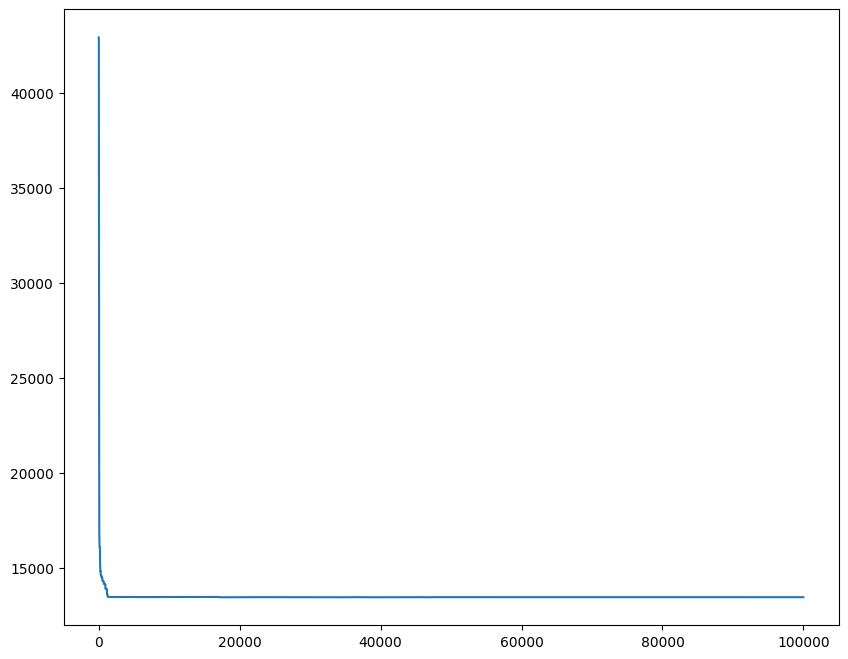

In [52]:
#time to run monte carlo
i = 0
initial_state = get_state(scrambled_text, tr, fr, char_to_ix)

while i < 1:
    state, lps, _ = metropolis_hastings(initial_state, propose_a_move, compute_probability_of_state,
                                    iters=100000, print_every=500, tolerance=0.02, pretty_state=pretty_state)

    plt.plot(lps)
    i += 1

plt.show()

We can compare the last state text with the original one:

In [53]:
print('Original text:')
pretty_print(t)

Original text:
.
What authority surfeits on would relieve us: if they
would yield us but the superfluity, while it were
wholesome, we might guess they relieved us humanely;
but they think we are too dear: the leanness that
afflicts us, the object of our misery, is as an
inventory to particularise their abundance; our
sufferance is a gain to them Let us revenge this with
our pikes, ere we become rakes: for the gods know I
speak this in hunger for bread, not in thirst for revenge.

 ...
